# Introduction to matplotlib

`matplotlib` is the Python plotting package to rule them all. Not because it's the best. Or the easiest to use. Or the fastest. Or... wait, why is it the number 1 plotting package? Nobody knows! But it's everywhere, and making basic plots is... fine. It's really fine.

In [147]:
import numpy as np
import matplotlib.pyplot as plt
import pooch

spot = pooch.create(path='../data', base_url="https://geocomp.s3.amazonaws.com/data/",
                    registry={"F3_8-bit_int.sgy": "md5:cbde973eb6606da843f40aedf07793e4",
                              "F3_horizon.npy": "md5:9ba4f498ba3e2dfebeaa739aeac68d04",
                              "F3_Demo_0_FS4.dat": None, })

Let's get some well data to play with.

In [2]:
from welly import Well

w = Well.from_las('https://geocomp.s3.amazonaws.com/data/L-30.las')

dt = w.data['DT'].values
depth = w.data['DT'].basis

rhob = w.data['RHOB'].values

/home/matt/miniconda3/envs/geocomp/lib/python3.9/site-packages/welly/well.py:194: FutureWarning: From v0.5 the default will be 'original', keeping whatever is used in the LAS file. If you want to force conversion to metres, change your code to use `index='m'`.
  warnings.warn(m, FutureWarning)


In [10]:
# Using numpy files, in case no welly or lasio
ds = np.DataSource('../data')  # <- Local target.

url = 'https://geocomp.s3.amazonaws.com/data/L-30_Depth-DT-RHOB.csv'
depth, dt, rhob = np.loadtxt(ds.open(url, mode='rt'), delimiter=',')

In [9]:
# To use lasio
import lasio

las = lasio.read('https://geocomp.s3.amazonaws.com/data/L-30.las')

dt = las.curves['DT'].data
rhob = las.curves['RHOB'].data
depth = las.curves['DEPTH:1'].data

## First steps

The first step is usually just a quick plot.

If we have a simple 1D array of numbers, we just pass `y`, and `x` will be generated from the indices of the elements.

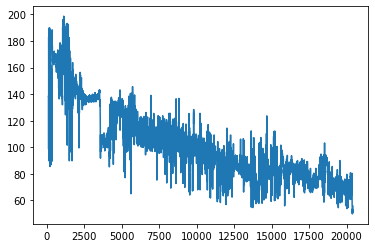

In [9]:
plt.plot(dt)

This is the `pyplot` interface to `matplotlib`. It's the easiest one to use, but it's less flexible than the so-called 'object-oriented' interface.

Here's the official tutorial for the `pyplot` interface: https://matplotlib.org/tutorials/introductory/pyplot.html

Producing the same plot with the object-oriented interface looks like this:

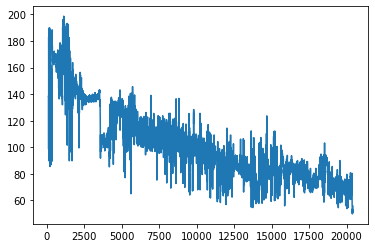

In [10]:
fig, ax = plt.subplots()

ax.plot(dt)

For the rest of this lesson, we're going to use the object-oriented approach.

### Exercise

- Plot the data vertically, with depth on the y-axis instead of DT. You will need to pass both arrays to the `plot` method: `ax.plot(x, y)`.
- Add `color='red'` to your call to plot.
- What happens if you add another line with `ax.set_ylim(830, 880)`?
- Can you display the whole well with 0 at the top?
- Try instantiating the figure with `plt.subplots(figsize=(2,10))` at the start.

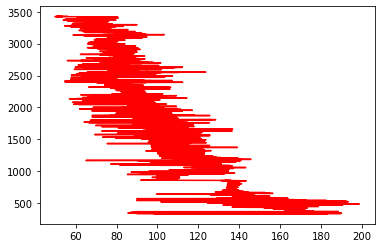

In [11]:
fig, ax = plt.subplots()

ax.plot(dt, depth, 'r')

(830.0, 880.0)

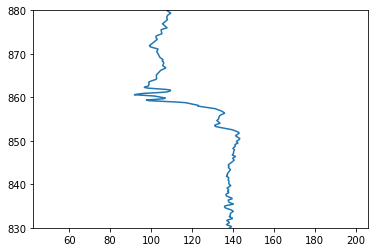

In [53]:
fig, ax = plt.subplots()

ax.plot(dt, depth)
ax.set_ylim(830, 880)

(830.0, 880.0)

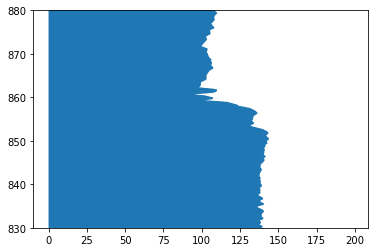

In [54]:
fig, ax = plt.subplots()

ax.plot(dt, depth)
ax.fill_betweenx(depth, 0, dt)
ax.set_ylim(830, 880)

(830.0, 880.0)

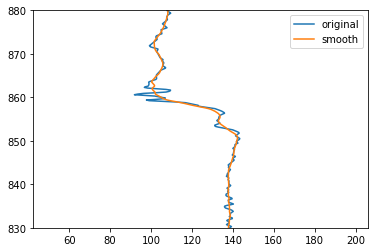

In [56]:
dtsm = np.convolve(np.ones(21)/21, dt, mode='same')

fig, ax = plt.subplots()

ax.plot(dt, depth, label='original')
ax.plot(dtsm, depth, label='smooth')
ax.legend()
ax.set_ylim(830, 880)

(3550.3359999988334, 0.0)

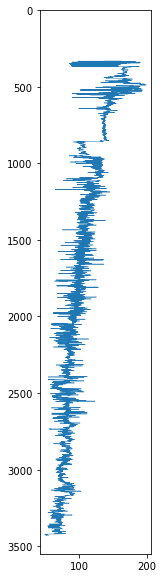

In [58]:
fig, ax = plt.subplots(figsize=(2,10))

ax.plot(dt, depth, lw=0.5)
ax.set_ylim(depth[-1]+100, 0)

We can add another subplot:

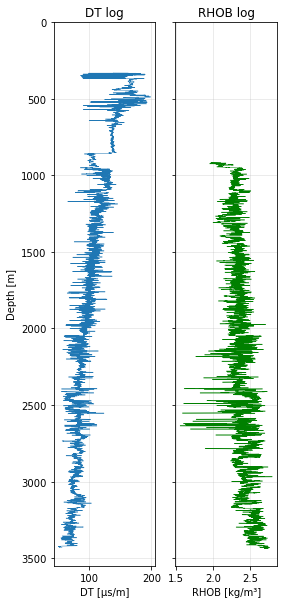

In [72]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(4, 10), sharey=True)

ax0.plot(dt, depth, lw=0.5)
ax0.set_ylim(depth[-1]+100, 0)
ax0.set_xlabel('DT [µs/m]')
ax0.set_ylabel('Depth [m]')
ax0.set_title('DT log')
ax0.grid('k', alpha=0.3)

ax1.plot(rhob, depth, 'g', lw=0.5)
ax1.set_ylim(depth[-1]+100, 0)
ax1.set_xlabel('RHOB [kg/m³]')
ax1.set_title('RHOB log')
ax1.grid('k', alpha=0.3)

plt.show()  # <--- Note that you need this in a script.

## `plt.scatter()`

It's also easy to make scatter plots:

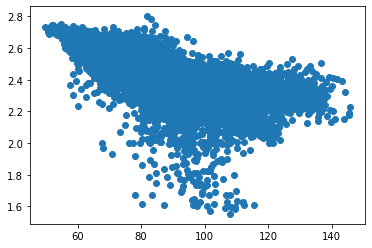

In [68]:
fig, ax = plt.subplots()

ax.scatter(dt, rhob)

We can adjust how the points plot to make it more interesting:

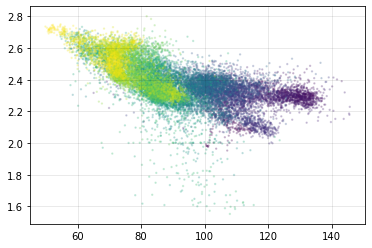

In [69]:
fig, ax = plt.subplots()

ax.scatter(dt, rhob, c=depth, s=2, alpha=0.2)
ax.grid(c='k', alpha=0.1)

## `plt.hist()`

We often want to look at the distribution of our data.

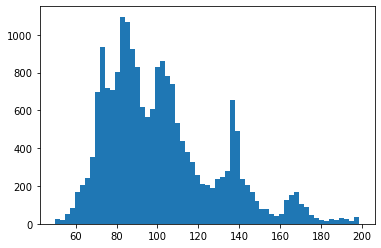

In [71]:
fig, ax = plt.subplots()

_ = ax.hist(dt, bins='auto')

In general, `seaborn` makes nicer histograms, and adds a KDE (kernel density estimation) plot. It also prefers data without NaNs though...

<AxesSubplot:ylabel='Count'>

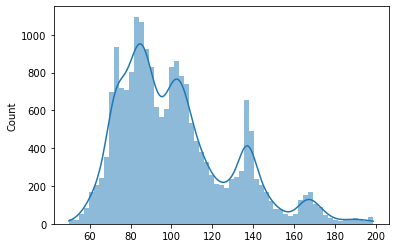

In [30]:
import seaborn as sns

sns.histplot(dt, kde=True, lw=0)

## `plt.bar()`

We can use the data from `plt.hist()` to make our own bar chart. First, let's check what we get back:

(61, 62)

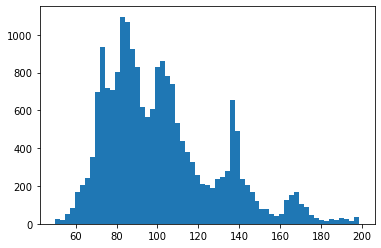

In [73]:
fig, ax = plt.subplots()

n, bins, _ = ax.hist(dt, bins='auto')

n.size, bins.size

We have to compute the bin centres to put them in the right place on the _x_ axis.

In [75]:
bins = (bins[1:] + bins[:-1]) / 2

<BarContainer object of 61 artists>

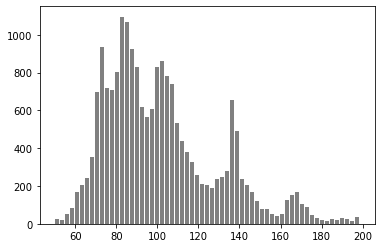

In [76]:
fig, ax = plt.subplots()

ax.bar(bins, n, width=2, color='gray')

We'd often like to get statistics from our data:

In [36]:
p50 = np.percentile(dt, 50)
p50

nan

Subsurface data often has NaNs in it... let's get rid of them:

In [37]:
arr = np.arange(25).reshape(5, 5)

arr > 12

# Then:

arr[arr > 12]

array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])

In [38]:
dtn = dt[~np.isnan(dt)]

Now we can compute some stats and use them in the bar plot:

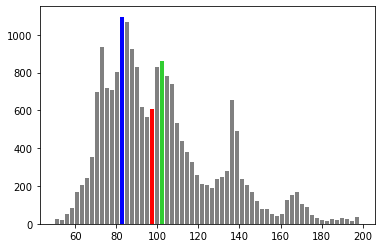

In [79]:
# For example, we could compute the bin containing the median value:
p50 = np.percentile(dtn, 50)
med_bin = np.argmin(np.abs(bins - p50))

# And the bin containing the mode:
mode_bin = np.argmax(n)

# And the bin containing the mean:
mean_bin = np.argmin(np.abs(bins - dtn.mean()))

colours = ['gray' for b in bins]
colours[med_bin] = 'r'
colours[mode_bin] = 'b'
colours[mean_bin] = 'limegreen'

fig, ax = plt.subplots()
ax.bar(bins, n, width=2, color=colours)
plt.show()

## `plt.imshow()` for raster data

For image-like data, such as slices of seismic, we need a different kind of visualization. 

NB There's also `plt.pcolor` but it's very slow. Use `plt.pcolormesh` instead.

Let's load some seismic data from a SEG-Y file.

In [187]:
import segyio

fname = spot.fetch('F3_8-bit_int.sgy')

with segyio.open(fname) as s:
    vol = segyio.cube(s)

In [188]:
# Using NumPy, if no Pooch.
# import numpy as np
# import segyio

# ds = np.DataSource('../data')  # <- Local target.

# url = 'https://geocomp.s3.amazonaws.com/data/F3_8-bit_int.sgy'

# with segyio.open(ds.open(url).name) as s:
#     vol = segyio.cube(s)

In [189]:
# Or get this file: https://agilegeo.s3.amazonaws.com/F3_8-bit_int.sgy
# And load it:
# vol = np.load('../data/Penobscot_0-1000ms.npy')

In [190]:
vol.shape

(225, 300, 463)

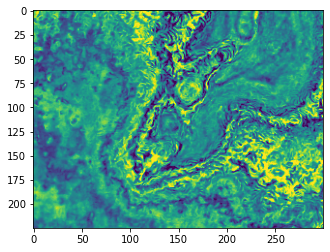

In [191]:
plt.imshow(vol[:, :, 300])

Adding a colorbar requires a little extra code. We can also make it larger.

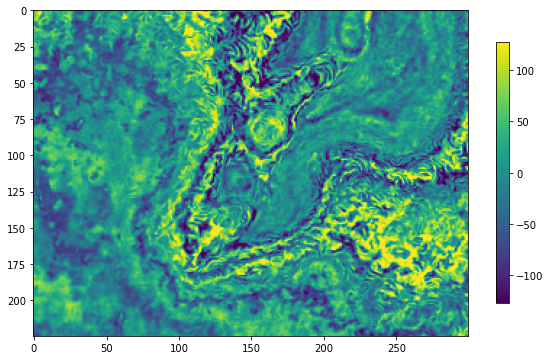

In [192]:
fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(vol[:, :, 300])
plt.colorbar(im, shrink=0.8)

### Exercise

- Try plotting a vertical section through the data. You'll need to think about indexing into `vol`.
- Can you make a histogram of the amplitudes? Tip: Use only one slice of the data and use the `ravel()` method on it to change it into a 1D array. If there are NaNs in the data, you may need to deal with them.

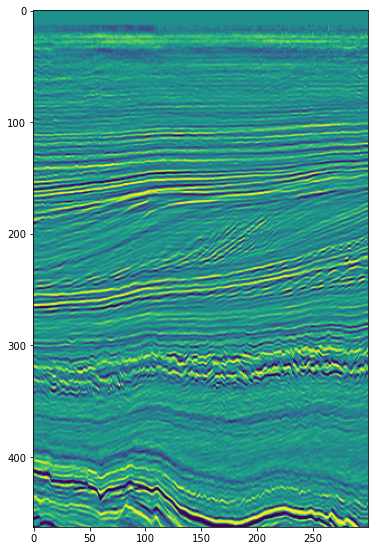

In [70]:
fig, ax = plt.subplots(figsize=(6, 10))
ax.imshow(vol[200, :, :].T)

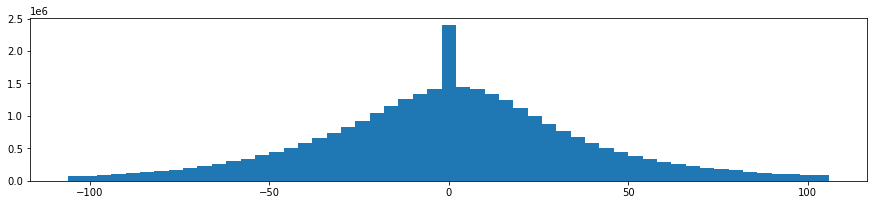

In [87]:
# The main trick is that you have to flatten the array:
fig, ax = plt.subplots(figsize=(15, 3))
n, bins, _ = ax.hist(vol.ravel(), bins=53, range=(-ma, ma))
# ax.set_yscale('log', nonpositive='clip')

## More `imshow` options

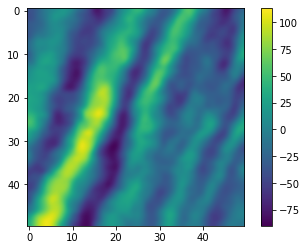

In [102]:
fig, ax = plt.subplots()
im = ax.imshow(vol[:50, :50, 200], interpolation='bicubic')
plt.colorbar(im)

Note that the colorbar is no longer symmetric. We can set the min and max of the display:

In [106]:
vol.min(), vol.max()

(-127, 127)

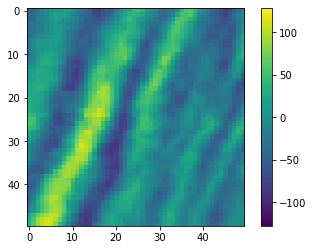

In [104]:
fig, ax = plt.subplots()
im = ax.imshow(vol[:50, :50, 200], vmin=-127, vmax=127)
plt.colorbar(im)

We can choose new colourmaps easily, and post the colorbar.

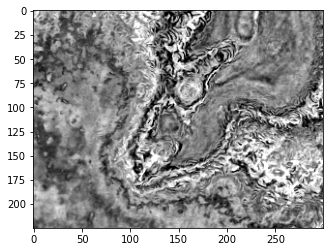

In [98]:
fig, ax = plt.subplots()
ax.imshow(vol[..., 300], cmap='gray', vmin=-127, vmax=127)

Note too that matplotlib colourmaps all have reversed versions, just add `_r` to the end of the name.

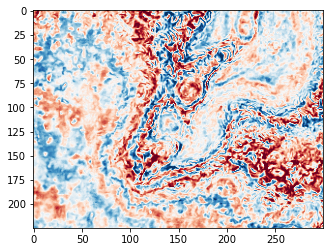

In [99]:
fig, ax = plt.subplots()
ax.imshow(vol[..., 300], cmap='RdBu_r', vmin=-127, vmax=127)

We can give the image inline-crossline coordinates or some other survey coordinates:

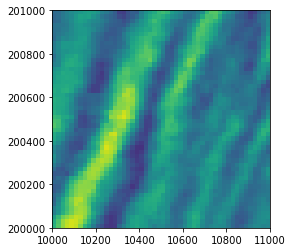

In [107]:
fig, ax = plt.subplots()
ax.imshow(vol[:50, :50, 200], extent=[10000, 11000, 200000, 201000], vmin=-127, vmax=127)

Notice that `plt.imshow()` assumes your pixels are sqaure. I find that I usually want to make this assumption.

## Contour maps and plotting multiple datasets

In [154]:
fname = spot.fetch('F3_horizon.npy')

In [155]:
with open(fname) as f:
    data = f.read()
    
print(data[:1000])

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 0: invalid start byte

In [156]:
hor = np.load(fname)

In [152]:
# Load with NumPy:
# ds = np.DataSource('../data')  # <- Local target.

# url = 'https://geocomp.s3.amazonaws.com/data/Penobscot_Seabed.npy'
# hor = np.load(ds.open(url, mode='rb'))

### EXERCISE

Plot this dataset using `imshow()`, adding a colorbar. 

In [116]:
### YOUR CODE HERE



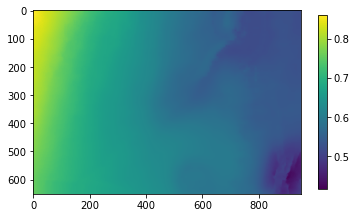

In [157]:
fig, ax = plt.subplots()
im = ax.imshow(hor)
plt.colorbar(im, shrink=0.8)

There's a 'filled contour' option too:

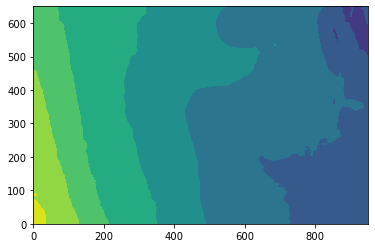

In [158]:
fig, ax = plt.subplots()
ax.contourf(hor)

We can also use `plt.contour()`

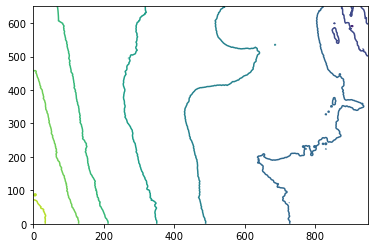

In [159]:
fig, ax = plt.subplots()
ax.contour(hor)

It's often nice to combine these:

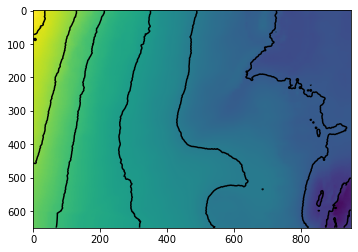

In [160]:
# Build this up gradually.
fig, ax = plt.subplots()
ax.imshow(hor)
ax.contour(hor, colors=['black'])

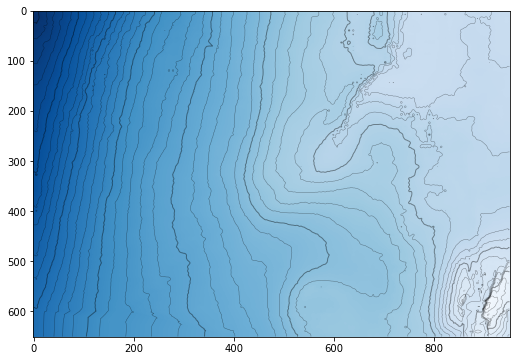

In [161]:
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(hor, cmap='Blues')

minn = np.nanmin(hor)
maxx = np.nanmax(hor) + 0.03

ax.contour(hor,
           levels=np.arange(minn, maxx, 0.010),
           colors='black', alpha=0.4,
           linewidths=[0.5, 0.5, 0.5, 0.5, 1],
          )

The horizon is in ms; if we cast it to Z-units of 'seismic sample number', we can add the horizon to the seismic:

In [162]:
hor_ = hor / 0.004

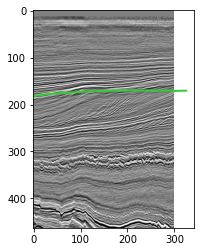

In [163]:
fig, ax = plt.subplots()
ax.imshow(vol[200, :, :].T, cmap="gray", vmin=-127, vmax=127)
ax.plot(hor_[::2, 200], 'limegreen', lw=2)

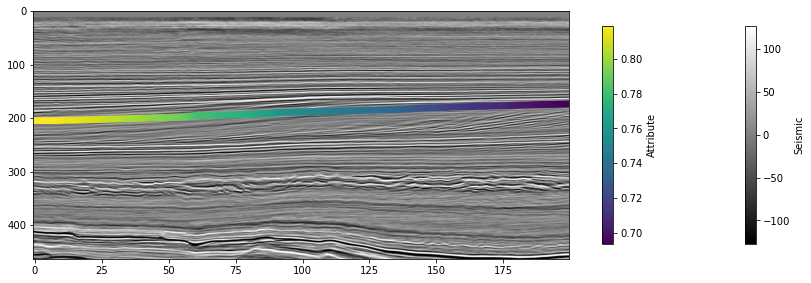

In [184]:
fig, ax = plt.subplots(figsize=(15, 10))
im = ax.imshow(vol[200, :200, :].T, cmap="gray", vmin=-127, vmax=127, aspect=0.2)
cbs = plt.colorbar(im, shrink=0.4)
scatter = ax.scatter(np.arange(200), hor[200, :200]/0.004, c=attribute[200, :200])
cbh = plt.colorbar(scatter, shrink=0.4)
cbs.set_label('Seismic')
cbh.set_label('Attribute')

## Adding decoration

So far we've kept most of our calls to matplotlib to one line or so.

Things can get much, much more complicated... The good news is that plots are usually built up, bit by bit. So you start with the one-liner, then gradually add things:

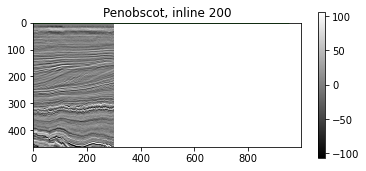

In [164]:
inline = 200

fig, ax = plt.subplots()
im = ax.imshow(vol[inline, :, :].T, cmap="gray", vmin=-ma, vmax=ma)
ax.plot(hor[inline, :], 'limegreen', lw=2)
ax.set_title(f"Penobscot, inline {inline}")
fig.colorbar(im, shrink=0.67)

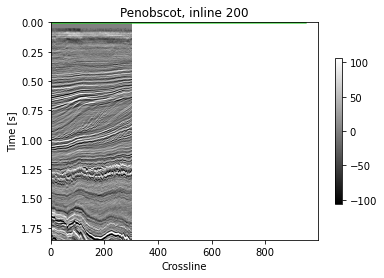

In [165]:
inl, xl, ts = vol.shape
extent = [0, xl, ts*0.004, 0]  # left, right, bottom, top

fig, ax = plt.subplots()
im = ax.imshow(vol[inline, :, :].T, cmap="gray", vmin=-ma, vmax=ma, extent=extent, aspect='auto')
ax.plot(0.004 * hor[inline, :], 'limegreen', lw=2)
ax.set_title(f"Penobscot, inline {inline}")
ax.set_xlabel("Crossline")
ax.set_ylabel("Time [s]")
fig.colorbar(im, shrink=0.67)

In [166]:
vol.shape

(225, 300, 463)

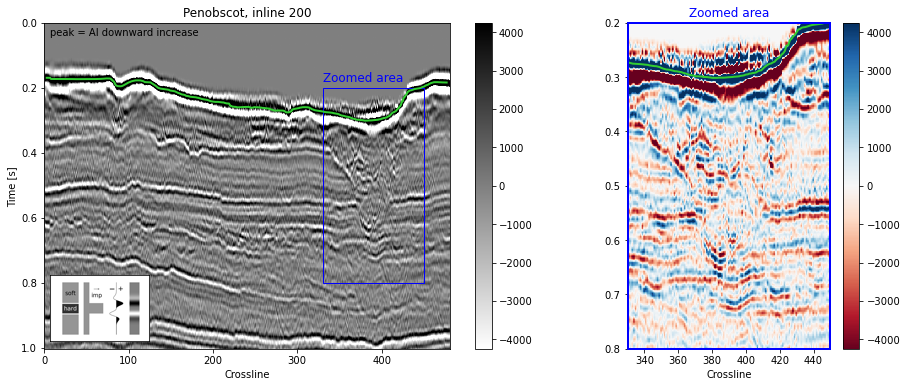

In [176]:
import matplotlib.patches as patches
import requests
from PIL import Image, ImageOps
import io

fig, axs = plt.subplots(ncols=2, figsize=(15, 6), gridspec_kw={'width_ratios': [2, 1]})

# Plot the main subplot.
ax = axs[0]
im = ax.imshow(vol[inline, :, :].T,
               extent=extent,
               cmap="gray_r",
               vmin=-ma, vmax=ma,
               aspect='auto',
              )
cb = fig.colorbar(im, ax=ax)
ax.plot(0.004 * hor[inline, :], 'limegreen', lw=2)
rect = patches.Rectangle((330, 50*0.004), 120, 150*0.004, lw=1, ec='b', fc='none')
ax.add_patch(rect)
ax.set_title(f"Penobscot, inline {inline}")
ax.set_xlabel("Crossline")
ax.set_ylabel("Time [s]")
ax.text(7, 0.04, "peak = AI downward increase")
ax.text(330, 0.18, "Zoomed area", color='b', fontsize=12)

# Add the polarity cartoon.
r = requests.get("https://agile.geosci.ai/polarity.png?cmap=gray_r")
img = Image.open(io.BytesIO(r.content))
img = ImageOps.expand(img, border=5, fill=(0, 0, 0))
img.thumbnail((100, 100))
fig.figimage(img, 50, 45)

# Plot the zoomed area.
ax = axs[1]
im = ax.imshow(vol[inline].T,
               extent=extent,
               vmin=-ma, vmax=ma,
               cmap='RdBu',
               aspect='auto',
              )
ax.plot(0.004 * hor[inline, :], 'limegreen', lw=2)
for spine in ax.spines.values():
    spine.set_edgecolor('blue')
    spine.set_linewidth(2)
fig.colorbar(im, ax=ax)
ax.set_xlim(330, 450)
ax.set_ylim(0.8, 0.2)
ax.set_title('Zoomed area', color='b')
ax.set_xlabel("Crossline")

plt.savefig("../data/my_figure.png", dpi=300)
plt.savefig("../data/my_figure.svg")

plt.show()

# How complicated do you want to get?

It turns out you can do almost anything in `matplotlib`. This is a `matplotlib` figure:

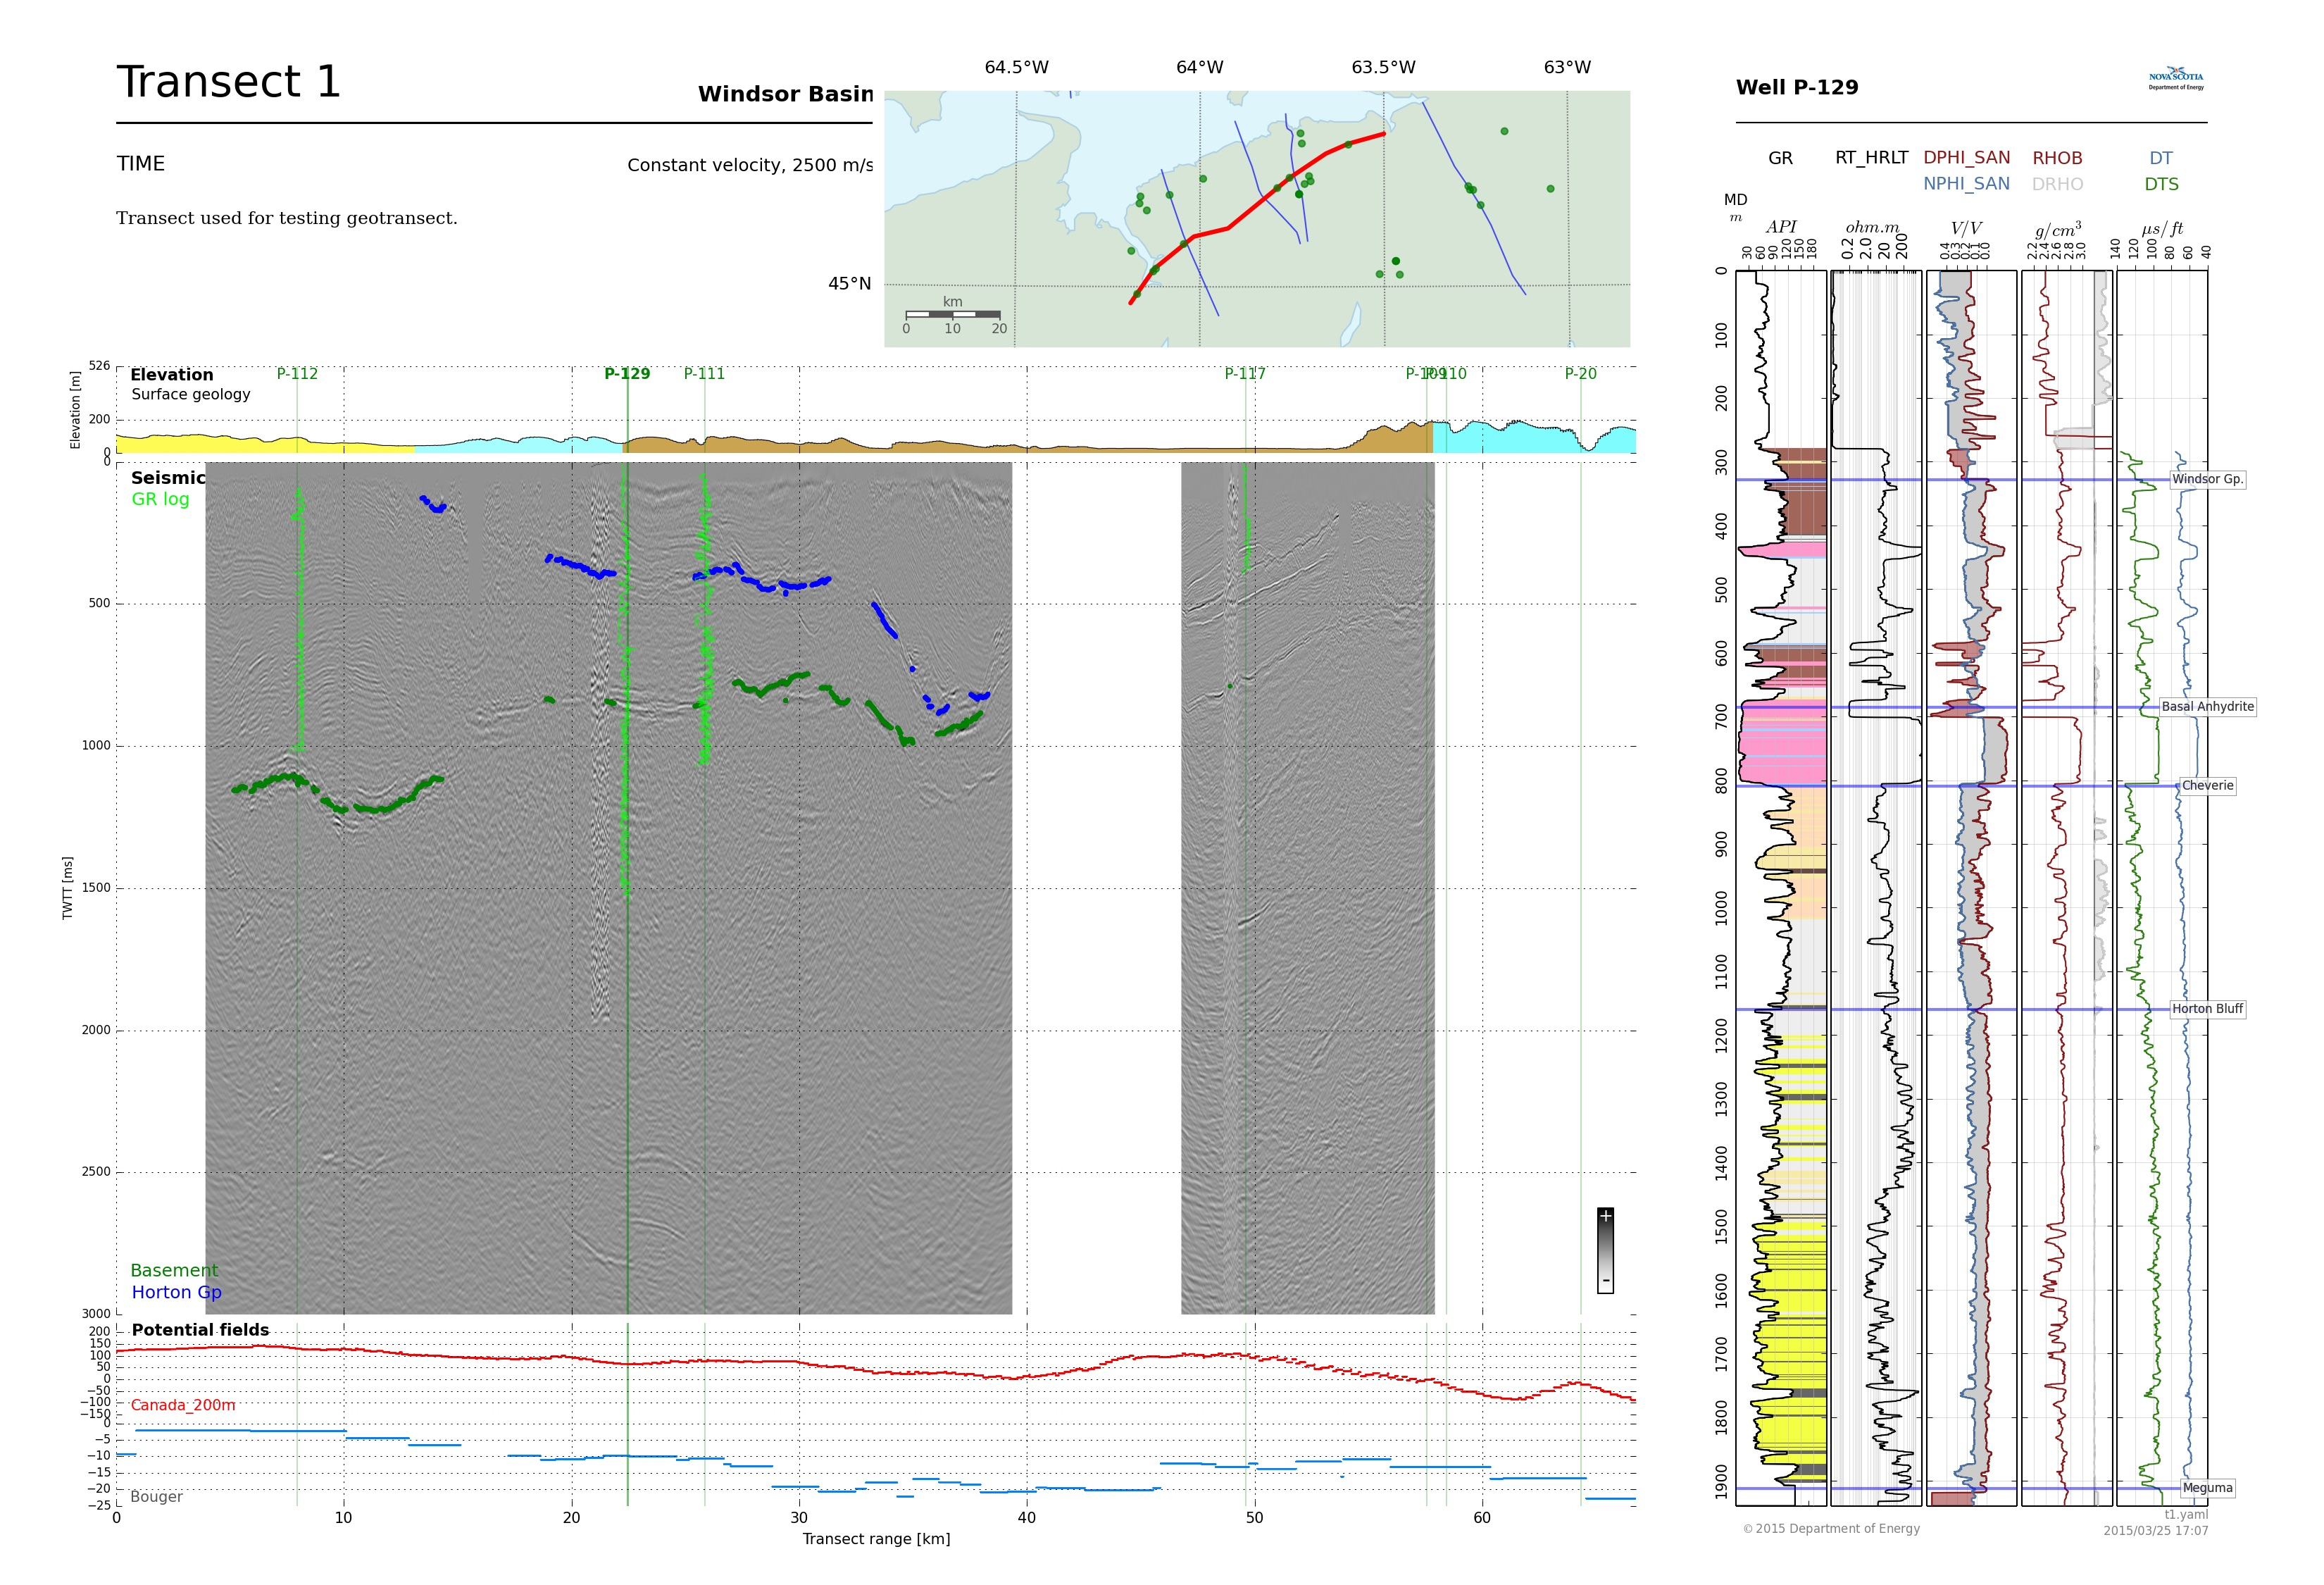

In [63]:
from IPython.display import Image
Image('../images/t1.png')

The key method you need to make a tiled plot like this is [`gridspec`](https://matplotlib.org/users/gridspec.html). You will also need a lot of patience.

## Getting help

- Gallery: https://matplotlib.org/3.1.1/gallery/index.html
- Gallery: https://python-graph-gallery.com/matplotlib/
- Cheatsheets: https://github.com/matplotlib/cheatsheets
- Book: https://github.com/rougier/scientific-visualization-book